In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

### 使用OpenCV，python进行行人检测
- 利用HOGDetector预训练好的接口进行检测（HOG用于特征提取，SVM用于分类）。

- 该方法不需要重新训练，不需要GPU，在有CPU的电脑上直接调用即可运行。

- 缺点为准确率较低。摄像头实时检测时只能识别离摄像头有一定距离的人，过远和过近均不能准确检测，并且只对站立的人体有较好的识别率。

#### （1）静态图片行人检测

[[304 125 216 431]
 [504  64 243 486]] [[2.31743736]
 [1.47805882]]


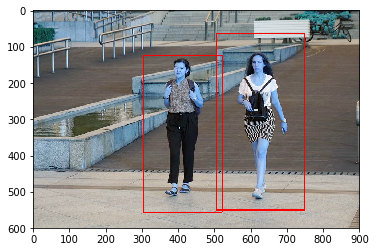

In [4]:
import cv2

def is_inside(o,i):
    ox,oy,ow,oh = o
    ix,iy,iw,ih = i
    return ox>ix and oy>iy and ox+ow<ix+iw and oy+oh<iy+ih

def draw_person(image,person):
    x,y,w,h=person
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)

# 使用opencv的hog特征进行行人检测
img = cv2.imread("test1.jpg")
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

found, w = hog.detectMultiScale(img)

print(found,w)
foundList = []
for ri,r in enumerate(found):
    flag = 0
    for qi,q in enumerate(found):
        if ri != qi and is_inside(r,q):
            flag = 1
    if(flag == 0):
        foundList.append(r)

for person in foundList:
    draw_person(img,person)
plt.imshow(img)

#### （2）视频行人检测
直接运行 python hog_person_detection.py 即可

In [ ]:
import cv2
import time

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
cap = cv2.VideoCapture("C:\\Users\\yao\\Desktop\\detection\\video_2.mp4")
while True:
    r, frame = cap.read()
    if r:
        start_time = time.time()
        #frame = cv2.resize(frame,(1280, 720)) # Downscale to improve frame rate
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY) # HOG needs a grayscale image

        rects, weights = hog.detectMultiScale(gray_frame)
        
        # Measure elapsed time for detections
        end_time = time.time()
        print("Elapsed time:", end_time-start_time)
        
        for i, (x, y, w, h) in enumerate(rects):
            if weights[i] < 0.7:
                continue
            cv2.rectangle(frame, (x,y), (x+w,y+h),(0,255,0),2)

        cv2.imshow("preview", frame)
    k = cv2.waitKey(1)
    if k & 0xFF == ord("q"): # Exit condition
        break

#### （3）摄像头实时行人检测
直接运行 python webcam_person_detection.py 即可

In [ ]:
# import the necessary packages
import numpy as np
import cv2
 
# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
cv2.startWindowThread()
# open webcam video stream
cap = cv2.VideoCapture(0)
# the output will be written to output.avi
out = cv2.VideoWriter(
    'output.avi',
    cv2.VideoWriter_fourcc(*'MJPG'),
    15.,
    (640,480))
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    # resizing for faster detection
    frame = cv2.resize(frame, (640, 480))
    # using a greyscale picture, also for faster detection
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    # detect people in the image
    # returns the bounding boxes for the detected objects
    boxes, weights = hog.detectMultiScale(frame, winStride=(8,8) )
    boxes = np.array([[x, y, x + w, y + h] for (x, y, w, h) in boxes])
    for (xA, yA, xB, yB) in boxes:
        # display the detected boxes in the colour picture
        cv2.rectangle(frame, (xA, yA), (xB, yB),
                          (0, 255, 0), 2)
    
    # Write the output video 
    out.write(frame.astype('uint8'))
    # Display the resulting frame
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# When everything done, release the capture
cap.release()
# and release the output
out.release()
# finally, close the window
cv2.destroyAllWindows()
cv2.waitKey(1)